In [1]:
import numpy as np
import scipy as ci 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from sklearn.externals import joblib

import seaborn as sns 
import random
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

# testing

In [6]:
simu = pd.read_csv('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/GNN/gnn_icecube-master/models/first_trial/yang_8/preds.csv',skiprows=0)

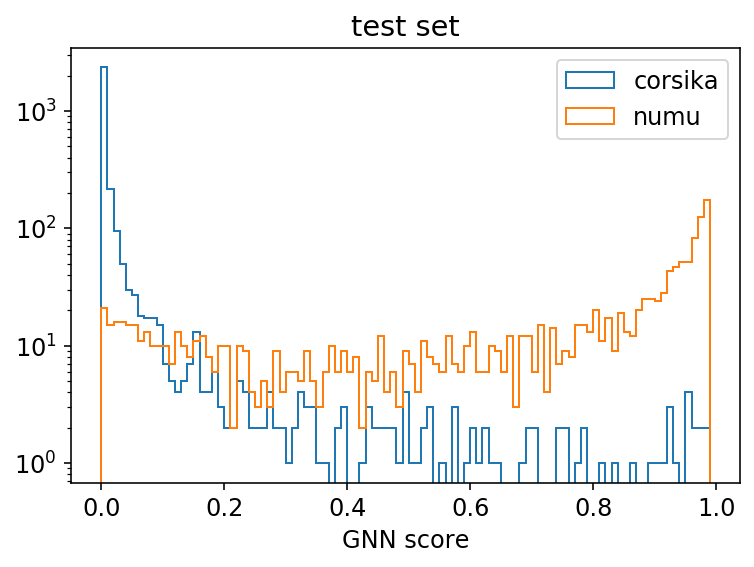

In [7]:
plt.hist(simu['prediction'][simu['true']==0],bins=np.arange(0,1,0.01),label='corsika',histtype='step')
plt.hist(simu['prediction'][simu['true']==1],bins=np.arange(0,1,0.01),label='numu',histtype='step')
plt.xlabel('GNN score')
plt.title('test set')
plt.semilogy()
plt.legend()
plt.show()

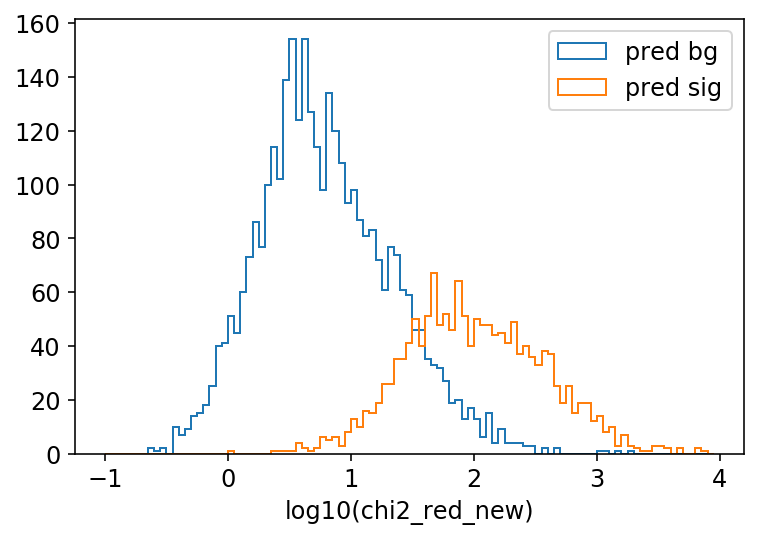

In [8]:
plt.hist(np.log10(simu['chi2_red_new'])[simu['prediction']<0.5],bins=np.arange(-1,4,0.05),label='pred bg',histtype='step')
plt.hist(np.log10(simu['chi2_red_new'])[simu['prediction']>0.5],bins=np.arange(-1,4,0.05),label='pred sig',histtype='step')
plt.xlabel('log10(chi2_red_new)')
plt.legend()
plt.show()

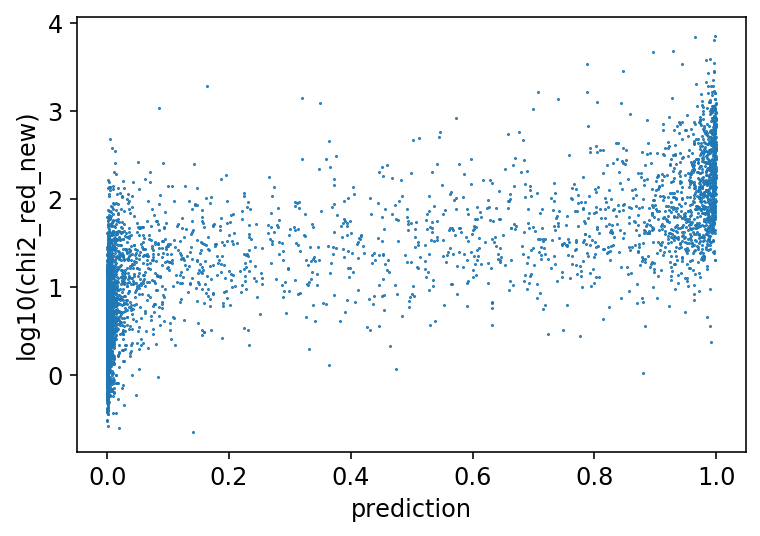

In [9]:
plt.plot(simu['prediction'],np.log10(simu['chi2_red_new']),'.',ms=1)
plt.xlabel('prediction')
plt.ylabel('log10(chi2_red_new)')
plt.show()

In [11]:
data = pd.read_csv('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/GNN/gnn_icecube-master/models/first_trial/yang_8/preds_data_burn.csv',skiprows=0)

In [12]:
data.head()

,event_id,run_id,prediction,qtot,chi2_red_new,ineff
0,3666043,128440,0.045731,4357.938844,8.529129,0.008817
1,322550,129281,0.001342,6247.617569,1.339569,0.083634
2,25196071,129344,0.004135,5265.198818,9.530264,0.082263
3,28926995,129420,0.002005,6025.132477,5.445585,0.015697
4,47063664,127963,0.001908,6687.687042,5.099658,0.193681


In [13]:
# target:
# run: 120638,122675,128192,128781
# event: 3751965,70838028,50877282,74812129

In [15]:
print(np.log10(data['chi2_red_new'])[(data['event_id']==3751965)&(data['run_id']==120638)])
print(np.log10(data['chi2_red_new'])[(data['event_id']==70838028)&(data['run_id']==122675)])
print(np.log10(data['chi2_red_new'])[(data['event_id']==50877282)&(data['run_id']==128192)])
print(np.log10(data['chi2_red_new'])[(data['event_id']==74812129)&(data['run_id']==128781)])

120417    3.03031
Name: chi2_red_new, dtype: float64
95913    2.728777
Name: chi2_red_new, dtype: float64
9682    2.691984
Name: chi2_red_new, dtype: float64
7626    2.973462
Name: chi2_red_new, dtype: float64


In [16]:
print(data['prediction'][(data['event_id']==3751965)&(data['run_id']==120638)])
print(data['prediction'][(data['event_id']==70838028)&(data['run_id']==122675)])
print(data['prediction'][(data['event_id']==50877282)&(data['run_id']==128192)])
print(data['prediction'][(data['event_id']==74812129)&(data['run_id']==128781)])

120417    0.183179
Name: prediction, dtype: float64
95913    0.981379
Name: prediction, dtype: float64
9682    0.508068
Name: prediction, dtype: float64
7626    0.215794
Name: prediction, dtype: float64


In [ ]:
70838028 74812129 46102602
122675 128781 133811

In [18]:
# new sample and bg estimation method 
print(data['prediction'][(data['event_id']==70838028)&(data['run_id']==122675)])
print(data['prediction'][(data['event_id']==74812129)&(data['run_id']==128781)])
print(data['prediction'][(data['event_id']==46102602)&(data['run_id']==133811)])

95913    0.981379
Name: prediction, dtype: float64
7626    0.215794
Name: prediction, dtype: float64
56965    0.986801
Name: prediction, dtype: float64


In [28]:
print(data['ineff'][(data['event_id']==70838028)&(data['run_id']==122675)])
print(data['ineff'][(data['event_id']==74812129)&(data['run_id']==128781)])
print(data['ineff'][(data['event_id']==46102602)&(data['run_id']==133811)])

95913    0.00807
Name: ineff, dtype: float64
7626    0.004261
Name: ineff, dtype: float64
56965    0.007045
Name: ineff, dtype: float64


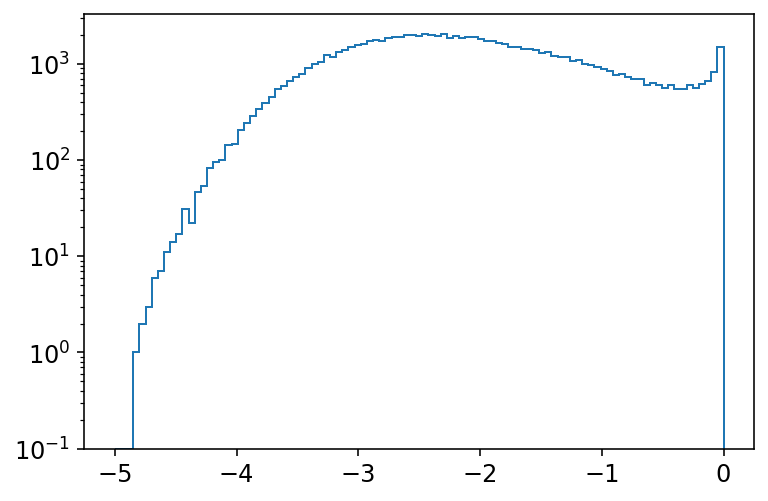

In [33]:
plt.hist(np.log10(data['prediction'][data['ineff']<0.01]),log=True,bins=np.linspace(-5,0,100),histtype='step')
plt.show()